# Lab Assignment 8: Data Management Using `pandas`, Part 1
## DS 6001: Practice and Application of Data Science

## H. Diana McSpadden (hdm5s)

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

In this lab, you will be working with the [2017 Workplace Health in America survey](https://www.cdc.gov/workplacehealthpromotion/survey/data.html) which was conducted by the Centers for Disease Control and Prevention. According to the survey's [guidence document](https://www.cdc.gov/workplacehealthpromotion/data-surveillance/docs/2017-WHA-Guidance-Document-for-Use-of-Public-Data-files-508.pdf):

> The Workplace Health in America (WHA) Survey gathered information from a cross-sectional, nationally representative sample of US worksites. The sample was drawn from the Dun & Bradstreet (D&B) database of all private and public employers in the United States with at least 10 employees. Like previous national surveys, the worksite served as the sampling unit rather than the companies or firms to which the worksites belonged. Worksites were selected using a stratified simple random sample (SRS) design, where the primary strata were ten multi-state regions defined by the Centers for Disease Control and Prevention (CDC), plus an additional stratum containing all hospital worksites. 

The data contain over 300 features that report the industry and type of company where the respondents are employed, what kind of health insurance and other health programs are offered, and other characteristics of the workplaces including whether employees are allowed to work from home and the gender and age makeup of the workforce. The data are full of interesting information, but in order to make use of the data a great deal of data manipulation is required first.

## Problem 0
Import the following libraries:

In [2]:
import numpy as np
import pandas as pd
import sidetable
import sqlite3
import warnings
warnings.filterwarnings('ignore')

## Problem 1
The raw data are stored in an ASCII file on the 2017 Workplace Health in America survey [homepage](https://www.cdc.gov/workplacehealthpromotion/survey/data.html). Load the raw data directly into Python without downloading the data onto your harddrive and display a dataframe with only the 14th, 28th, and 102nd rows of the data. [1 point]

https://www.cdc.gov/workplacehealthpromotion/survey/data.html

In [3]:
pd.set_option('display.max_columns', None) # displaying all the columns

In [4]:
# https://www.cdc.gov/workplacehealthpromotion/data-surveillance/docs/whpps_120717.csv
# This file is an ASCII “~” delimited file with all of the corresponding survey data.

csv_url = 'https://www.cdc.gov/workplacehealthpromotion/data-surveillance/docs/whpps_120717.csv'
df_p1 = pd.read_csv(csv_url, sep='~')

# doing the 13th, 27th, and 101st idx's to display the 14th, 28th, and 102nd rows since the index starts at 0
idxs_to_display = [13,27,101] 

df_p1.iloc[idxs_to_display]

,OC1,OC3,HI1,HI2,HI3,HI4,HRA1,HRA1A,HRA1B,HRA1E,CP1,CP2,CP3,CP4,CP5,HP1,HP2,HP3,HP4,HP5,HP5A,HP6,HP7A,HP7B,HP7C,HP7D,HP7D1,HP7D2,HP7D3,HP7E,HP7E1,HP7F,HP7F1,HP7F2,HP7F3,HP7F4,HP7F5,HP7F6,HP7F7,HP7F8,HP7F9,HP7F10,HP7F11,HP7G,HP8,HPR1_1,HPR1_1A,HPR1_1B,HPR1_1C,HPR1_2A,HPR1_2B,HPR1_2C,HPR1_2D,HPR1_2E,HPR1_2F,HPR1_2G,HPR1_2H,HPR1_2I,HPR1_2J,HPR1_2K,HPR2_1,HPR2_1A,HPR2_1B,HPR2_1C,HPR2_2A,HPR2_2B,HPR2_2C,HPR2_2D,HPR2_3A,HPR2_3B,HPR2_3C,HPR2_3D,HPR2_4A,HPR2_4B,HPR2_4C,HPR2_4D,HPR2_4E,HPR3_1,HPR3_1A,HPR3_1B,HPR3_1C,HPR3_2,HPR4_1,HPR4_1A,HPR4_1B,HPR4_1C,HPR4_2A,HPR4_2B,HPR4_2C,HPR4_2D,HPR4_2E,HPR4_2F,HPR4_2G,HPR4_2G1,HPR4_2G2,HPR4_2G3,HPR4_2G4,HPR4_2G5,HPR4_2G6,HPR4_2G7,HPR5_1,HPR5_1A,HPR5_1B,HPR6_1,HPR6_1A,HPR6_1B,HPR6_1C,HPR7_1,HPR7_1A,HPR7_1B,HPR7_1C,HPR8_1,HPR8_1A,HPR8_1B,HPR8_1C,HPR9_1,HPR9_1A,HPR9_1B,HPR9_1C,HS11,HS11_2,HS11A,HS12,HS12_2,HS13,HS13_2,HS14,HS14_2,HS15,HS15_2,HS16,HS16_2,HS17,HS17_2,HS18,HS18_2,HS19,HS19_2,HS2A,HS2B,HS3,DM11M1,DM11M2,DM11M3,DM12M1,DM12M2,DM12M3,DM13M1,DM13M2,DM13M3,DM14M1,DM14M2,DM14M3,DM15M1,DM15M2,DM15M3,DM16M1,DM16M2,DM16M3,DM17M1,DM17M2,DM17M3,DM18M1,DM18M2,DM18M3,DM19M1,DM19M2,DM19M3,DM20M1,DM20M2,DM20M3,DM2A,DM2B,DM3,KP2,KP3_1,KP3_2,KP3_3,KP4,KP5A,KP5C,KP5E,KP5F,KP5G,KP5H,KP5J,KP5J_01,WL1,WL2,WL3M1,WL3M2,WL3M3,WL3M4,WL3M5,WL5,WL6,WL7,WL8,WL9,WL11,WL12,WL14,WL15,B1_1,B1_2,B1_3,B1_4,B1_5,B1_6,B1_7,B1_8,B1_9,B1_10,B1_11,B1_12,OSH1,OSH2,OSH3,OSH4,OSH5,OSH6,OSH7_1,OSH7_2,OSH7_3,E1M1,E1M2,E1M3,E1M4,E1M5,E1M6,E1M7,E1M8,E1M9,E2,WD1_1,WD1_2,WD2,WD3,WD4,WD5,WD6,WD7,HPR5_2A_S,HPR5_2B_S,HPR5_2C_S,HPR5_2D_S,HPR5_2E_S,WL1_1_S,WL1_2_S,WL1_3_S,WL1_4_S,WL1_5_S,HPR9_2A_S,HPR9_2B_S,HPR9_2C_S,HPR9_2D_S,HPR9_2E_S,HPR9_2F_S,HPR8_2A_S,HPR8_2B_S,HPR8_2C_S,HPR8_2D_S,HPR8_2E_S,HPR7_2A_S,HPR7_2C_S,HPR7_2D_S,HPR7_2E_S,HPR7_2F_S,HPR6_2A_S,HPR6_2B_S,HPR6_2C_S,HPR6_2D_S,HPR6_2E_S,OSH7_1_S,OSH7_2_S,OSH7_4_S,OSH7_6_S,OSH8_S,OSH81A_S,OSH81B_S,OSH81C_S,KP1A_S,KP1B_S,KP1C_S,KP1D_S,KP1E_S,KP1F_S,KP1G_S,KP1G_S_01,HOSPITAL,OC1_07,WL3_05,E1_09,Suppquex,Id,Region,CDC_Region,Industry,Size,Varstrata,"Finalwt_worksite,,,,"
13,3,1.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,5.0,96.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,97.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,97.0,3.0,2.0,96.0,96.0,96.0,1.0,1.0,1.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,96.0,96.0,96.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,96.0,96.0,96.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,97.0,98.0,1.0,1.0,2.0,96.0,96.0,2.0,96.0,96.0,96.0,2.0,96.0,96.0,96.0,2.0,96.0,96.0,96.0,2.0,96.0,96.0,96.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,9.0,2.0,9.0,2.0,9.0,2.0,9.0,2.0,9.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,NaN,97.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,97.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,97.0,3.0,4.0,1.0,2.0,97.0,2.0,1.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,5.0,30.0,5.0,95.0,85.0,40.0,1.0,0.0,5.0,2.0,2.0,1.0,1.0,2.0,96.0,96.0,96.0,96.0,96.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,97.0,1.0,97.0,2.0,9.0,9.0,9.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,1.0,1437.0,4.0,6.0,7.0,3.0,0.0,"47.793940929,,,,"
27,1,3.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,8.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,3.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

## Problem 2 
The data contain 301 columns. Create a new variable in Python's memory to store a working version of the data. In the working version, delete all of the columns except for the following:

* `Industry`: 7 Industry Categories with NAICS codes

* `Size`: 8 Employee Size Categories

* `OC3` Is your organization for profit, non-profit, government?

* `HI1` In general, do you offer full, partial or no payment of premiums for personal health insurance for full-time employees?

* `HI2` Over the past 12 months, were full-time employees asked to pay a larger proportion, smaller proportion or the same proportion of personal health insurance premiums?

* `HI3`: Does your organization offer personal health insurance for your part-time employees?

* `CP1`: Are there health education programs, which focus on skill development and lifestyle behavior change along with information dissemination and awareness building?

* `WL6`: Allow employees to work from home?

* Every column that begins `WD`, expressing the percentage of employees that have certain characteristics at the firm

[1 point]

confirming the 301 columns

In [5]:
df_p1.shape

(2843, 301)

In [6]:
# first, get all the wd_cols
wd_cols = df_p1.columns.where(df_p1.columns.str.contains('WD')).dropna().tolist()
#wd_cols

# create a list of the other columns requests
requested_cols = ['Industry','Size','OC3','HI1','HI2','HI3','CP1','WL6']
# add the wd_cols to the requested_cols

df_p2 = df_p1[requested_cols + wd_cols].copy()

In [7]:
print(df_p2.shape)
df_p2.head()

(2843, 16)


,Industry,Size,OC3,HI1,HI2,HI3,CP1,WL6,WD1_1,WD1_2,WD2,WD3,WD4,WD5,WD6,WD7
0,7.0,7.0,3.0,2.0,1.0,2.0,1.0,1.0,25.0,20.0,85.0,60.0,40.0,15.0,0.0,22.0
1,7.0,6.0,3.0,2.0,3.0,1.0,1.0,1.0,997.0,997.0,90.0,90.0,997.0,997.0,0.0,997.0
2,7.0,8.0,3.0,1.0,3.0,1.0,1.0,1.0,35.0,4.0,997.0,997.0,40.0,15.0,997.0,997.0
3,7.0,4.0,2.0,1.0,2.0,1.0,2.0,2.0,50.0,15.0,50.0,85.0,75.0,0.0,0.0,997.0
4,7.0,4.0,3.0,1.0,3.0,1.0,1.0,1.0,50.0,40.0,60.0,60.0,40.0,30.0,0.0,28.0


## Problem 3
The [codebook](https://www.cdc.gov/workplacehealthpromotion/data-surveillance/docs/2017-WHA-Datafile-Codebook-508.pdf) for the WHA data contain short descriptions of the meaning of each of the columns in the data. Use these descriptions to decide on better and more intuitive names for the columns in the working version of the data, and rename the columns accordingly. [1 point]

https://www.cdc.gov/workplacehealthpromotion/data-surveillance/docs/2017-WHA-Datafile-Codebook-508.pdf

* **OC3**: Is your organization for profit, non-profit, government?
* Health Insurance **HI1**: In general, do you offer full, partial or no payment of premiums for personal
health insurance for full-time employees?
* Health Insurance **HI2**: Over the past 12 months, were full-time employees asked to pay a larger
proportion, smaller proportion or the same proportion of personal health insurance premiums?
* Health Insurance **HI3**: Does your organization offer personal health insurance for your part-time
employees?
* Promoting Health at Work **CP1**: Health education programs, which focus on skill development and
lifestyle behavior change along with information dissemination and awareness building?
* Work-Life Programming, Policies and Benefits **WL6**: Allow employees to work from home?
* **WD1_1**: Workforce Demographics WD1_1: What percentage of employees are under age 30?
* **WD1_2**: Workforce Demographics WD1_2: What percentage of employees are age 60 or older?
* **WD2**:  Workforce Demographics WD2: What percentage of employees are female?
* **WD3**: Workforce Demographics WD3: What percentage of employees are hourly/non-exempt?
* **WD4**: Workforce Demographics WD4: What percentage of employees work something other than a typical daytime
shift?
* **WD5**: Workforce Demographics WD5: What percentage of employees regularly work remotely or off-site?
* **WD6**: Workforce Demographics WD6: What percentage of employees are under collective bargaining or unionized?
* **WD7**: Workforce Demographics WD7: What is the average annual percentage of turnover at this worksite
location?

In [8]:
new_cols = ['industry','org_size','org_type','premium_coverage','premium_change','part_time_coverage','wellness_program','work_from_home',
'under_30_perc','60_older_perc','female_perc','hourly_perc','off_shift_perc','remote_perc','union_perc','turnover_perc']

df_p2.columns = new_cols
print(df_p2.shape)
df_p2.head()

(2843, 16)


,industry,org_size,org_type,premium_coverage,premium_change,part_time_coverage,wellness_program,work_from_home,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc
0,7.0,7.0,3.0,2.0,1.0,2.0,1.0,1.0,25.0,20.0,85.0,60.0,40.0,15.0,0.0,22.0
1,7.0,6.0,3.0,2.0,3.0,1.0,1.0,1.0,997.0,997.0,90.0,90.0,997.0,997.0,0.0,997.0
2,7.0,8.0,3.0,1.0,3.0,1.0,1.0,1.0,35.0,4.0,997.0,997.0,40.0,15.0,997.0,997.0
3,7.0,4.0,2.0,1.0,2.0,1.0,2.0,2.0,50.0,15.0,50.0,85.0,75.0,0.0,0.0,997.0
4,7.0,4.0,3.0,1.0,3.0,1.0,1.0,1.0,50.0,40.0,60.0,60.0,40.0,30.0,0.0,28.0


## Problem 4
Using the codebook and this [dictionary of NAICS industrial codes](https://www.naics.com/search-naics-codes-by-industry/), place descriptive labels on the categories of the industry column in the working data. [1 point]

https://www.naics.com/search-naics-codes-by-industry/

* 1 = Industry Category 1: NAICS Sectors: 11, 21, 22, 23, 31-33 
    * 11 Agriculture, Forestry, Fishing and Hunting
    * 21	Mining
    * 22	Utilities
    * 23	Construction
    * 31-33	Manufacturing
* 2 = Industry Category 2: NAICS Sectors: 42, 44-45, 48-49
    * Wholesale Trade
    * Retail Trade
    * Transportation and Warehousing
* 3 = Industry Category 3: NAICS Sectors: 71, 72, 81
    * Arts, Entertainment, and Recreation
    * Accommodation and Food Services
    * Other Services (except Public Administration)
* 4 = Industry Category 4: NAICS Sectors: 51, 52, 53, 54, 55, 56
    * Information
    * Finance and Insurance
    * Real Estate Rental and Leasing
    * Professional, Scientific, and Technical Services
    * Management of Companies and Enterprises
    * Administrative and Support and Waste Management and Remediation Services
* 5 = Industry Category 5: NAICS Sectors: 61, 62 (excluding hospital worksites)
    * Educational Services
    * Health Care and Social Assistance
* 6 = Industry Category 6: NAICS Sectors: 92
    * Public Administration
* 7 = Industry Category 7: Hospital worksites (NAICS6 = 622110, 622210, 622310) 



In [9]:
industry_map = {1:'Agriculture, Infrastructure, and Mining', 
               2:'Trade, Transportation, and Warehousing',
               3:'Entertainment and Recreation', 
               4:'Professional, Managementment, and Administrative Services',
               5: 'Educational Services, Health Care, and Social Assistance',
               6: 'Public Administration',
               7:'Hospitals'}

df_p2.industry = df_p2.industry.map(industry_map)
df_p2.industry

0                   Hospitals
1                   Hospitals
2                   Hospitals
3                   Hospitals
4                   Hospitals
                ...          
2838    Public Administration
2839    Public Administration
2840    Public Administration
2841    Public Administration
2842    Public Administration
Name: industry, Length: 2843, dtype: object

In [10]:
df_p2.head()

,industry,org_size,org_type,premium_coverage,premium_change,part_time_coverage,wellness_program,work_from_home,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc
0,Hospitals,7.0,3.0,2.0,1.0,2.0,1.0,1.0,25.0,20.0,85.0,60.0,40.0,15.0,0.0,22.0
1,Hospitals,6.0,3.0,2.0,3.0,1.0,1.0,1.0,997.0,997.0,90.0,90.0,997.0,997.0,0.0,997.0
2,Hospitals,8.0,3.0,1.0,3.0,1.0,1.0,1.0,35.0,4.0,997.0,997.0,40.0,15.0,997.0,997.0
3,Hospitals,4.0,2.0,1.0,2.0,1.0,2.0,2.0,50.0,15.0,50.0,85.0,75.0,0.0,0.0,997.0
4,Hospitals,4.0,3.0,1.0,3.0,1.0,1.0,1.0,50.0,40.0,60.0,60.0,40.0,30.0,0.0,28.0


## Problem 5
Using the codebook, recode the "size" column to have three categories: "Small" for workplaces with fewer than 100 employees, "Medium" for workplaces with at least 100 but fewer than 500 employees, and "Large" for companies with at least 500 employees. [Note: Python dataframes have an attribute `.size` that reports the space the dataframe takes up in memory. Don't confuse this attribute with the column named "Size" in the raw data.] [1 point]

Size: 8 Employee Size Categories

 Cumulative Cumulative

 Size Column From Cookbook
---------------------------------------------------------------------------------
* 1 = Size Category 1: 10-24 
* 2 = Size Category 2: 25-49 
* 3 = Size Category 3: 50-99 
---------------------------------------------------------------------------------
* 4 = Size Category 4: 100-249 
* 5 = Size Category 5: 250-499 
---------------------------------------------------------------------------------
* 6 = Size Category 6: 500-749 
* 7 = Size Category 7: 750-999 
* 8 = Size Category 8: 1,000+ 

In [11]:
# set the org_size column to a category type
df_p2.org_size = df_p2.org_size.astype('category')

In [12]:
df_p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   industry            2842 non-null   object  
 1   org_size            2842 non-null   category
 2   org_type            2842 non-null   float64 
 3   premium_coverage    2842 non-null   float64 
 4   premium_change      2842 non-null   float64 
 5   part_time_coverage  2842 non-null   float64 
 6   wellness_program    2842 non-null   float64 
 7   work_from_home      2842 non-null   float64 
 8   under_30_perc       2842 non-null   float64 
 9   60_older_perc       2842 non-null   float64 
 10  female_perc         2842 non-null   float64 
 11  hourly_perc         2842 non-null   float64 
 12  off_shift_perc      2842 non-null   float64 
 13  remote_perc         2842 non-null   float64 
 14  union_perc          2842 non-null   float64 
 15  turnover_perc       2842 non-null   fl

In [13]:
size_map = {1:'Small', 
               2:'Small',
               3:'Small', 
               4:'Medium',
               5: 'Medium',
               6: 'Large',
               7:'Large',
               8:'Large'}

df_p2['org_size'] = df_p2.org_size.map(size_map)
print(df_p2.shape)
df_p2.head()

(2843, 16)


,industry,org_size,org_type,premium_coverage,premium_change,part_time_coverage,wellness_program,work_from_home,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc
0,Hospitals,Large,3.0,2.0,1.0,2.0,1.0,1.0,25.0,20.0,85.0,60.0,40.0,15.0,0.0,22.0
1,Hospitals,Large,3.0,2.0,3.0,1.0,1.0,1.0,997.0,997.0,90.0,90.0,997.0,997.0,0.0,997.0
2,Hospitals,Large,3.0,1.0,3.0,1.0,1.0,1.0,35.0,4.0,997.0,997.0,40.0,15.0,997.0,997.0
3,Hospitals,Medium,2.0,1.0,2.0,1.0,2.0,2.0,50.0,15.0,50.0,85.0,75.0,0.0,0.0,997.0
4,Hospitals,Medium,3.0,1.0,3.0,1.0,1.0,1.0,50.0,40.0,60.0,60.0,40.0,30.0,0.0,28.0


<AxesSubplot: title={'center': 'Count of Organizations by Size'}>

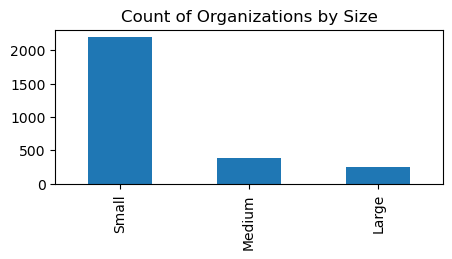

In [14]:
# plot a bar plot of the rows by org_size color on org_size
df_p2.org_size.value_counts().plot(kind='bar', title='Count of Organizations by Size', figsize=(5,2))

## Problem 6
Use the codebook to write accurate and descriptive labels for each category for each categorical column in the working data. Then apply all of these labels to the data at once. Code "Legitimate Skip", "Don't know", "Refused", and "Blank" as missing values. [2 points]

In [15]:
# org_type: OC3 (1 = For profit, public, 2 = For profit, private, 3 = Non-profit, 4 = State or local government, 5 = Federal government, 6 = Other, 97 = Don't know, 98 = Refusal, 99 = Blank )
# premium_coverage: HI1 (1 = Full insurance coverage offered, 2 = Partial insurance coverage offered, 3 = No insurance coverage offered, 97 = Don't know, 98 = Refusal, 99 = Blank   )
# premium_change: HI2 (1 = Larger, 2 = Smaller, 3 = About the same, 96 = Legitimate skip , 97 = Don't know, 98 = Refusal, 99 = Blank   )
# part_time_coverage: HI3 (1 = Yes, 2 = No, 97 = Don't know, 98 = Refusal, 99 = Blank   )
# wellness_program: CP1 (1 = Yes, 2 = No, 97 = Don't know, 98 = Refusal  )
# work_from_home: WL6 (1 = Yes, 2 = No, 97 = Don't know, 98 = Refusal  )
# make a copy of df_p2 for problem 6
df_p6 = df_p2.copy()

# make a replace map
replace_map = {'org_type':{1:'profit-public', 2:'profit-private', 3:'non-profit', 4:'state-local-govt', 5:'federal-govt', 6:'other', 97:np.nan, 98:np.nan, 99:np.nan},
              'premium_coverage':{1:'full', 2:'partial', 3:'none', 97:np.nan, 98:np.nan, 99:np.nan},
              'premium_change':{1:'larger', 2:'smaller', 3:'same', 96:np.nan, 97:np.nan, 98:np.nan, 99:np.nan},
              'part_time_coverage':{1:'yes', 2:'no', 97:np.nan, 98:np.nan, 99:np.nan},
              'wellness_program':{1:'yes', 2:'no', 97:np.nan, 98:np.nan, 99:np.nan},
              'work_from_home':{1:'yes', 2:'no', 97:np.nan, 98:np.nan, 99:np.nan}}

# use the replace map
df_p6 = df_p6.replace(replace_map)


In [16]:
df_p6.head()

,industry,org_size,org_type,premium_coverage,premium_change,part_time_coverage,wellness_program,work_from_home,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc
0,Hospitals,Large,non-profit,partial,larger,no,yes,yes,25.0,20.0,85.0,60.0,40.0,15.0,0.0,22.0
1,Hospitals,Large,non-profit,partial,same,yes,yes,yes,997.0,997.0,90.0,90.0,997.0,997.0,0.0,997.0
2,Hospitals,Large,non-profit,full,same,yes,yes,yes,35.0,4.0,997.0,997.0,40.0,15.0,997.0,997.0
3,Hospitals,Medium,profit-private,full,smaller,yes,no,no,50.0,15.0,50.0,85.0,75.0,0.0,0.0,997.0
4,Hospitals,Medium,non-profit,full,same,yes,yes,yes,50.0,40.0,60.0,60.0,40.0,30.0,0.0,28.0


## Problem 7
The features that measure the percent of the workforce with a particular characteristic use the codes 997, 998, and 999 to represent "Don't know", "Refusal", and "Blank/Invalid" respectively. Replace these values with missing values for all of the percentage features at the same time. [1 point]

In [17]:
df_p7 = df_p6.copy()

In [18]:
perccols = [x for x in df_p7.columns if x.endswith("perc")]
df_p7[perccols] = df_p7[perccols].replace([997, 998, 999], np.nan)

In [19]:
df_p7.head()

,industry,org_size,org_type,premium_coverage,premium_change,part_time_coverage,wellness_program,work_from_home,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc
0,Hospitals,Large,non-profit,partial,larger,no,yes,yes,25.0,20.0,85.0,60.0,40.0,15.0,0.0,22.0
1,Hospitals,Large,non-profit,partial,same,yes,yes,yes,NaN,NaN,90.0,90.0,NaN,NaN,0.0,NaN
2,Hospitals,Large,non-profit,full,same,yes,yes,yes,35.0,4.0,NaN,NaN,40.0,15.0,NaN,NaN
3,Hospitals,Medium,profit-private,full,smaller,yes,no,no,50.0,15.0,50.0,85.0,75.0,0.0,0.0,NaN
4,Hospitals,Medium,non-profit,full,same,yes,yes,yes,50.0,40.0,60.0,60.0,40.0,30.0,0.0,28.0


## Problem 8
Sort the working data by industry in ascending alphabetical order. Within industry categories, sort the rows by size in ascending alphabetical order. Within groups with the same industry and size, sort by percent of the workforce that is under 30 in descending numeric order. [1 point]

In [20]:
df_p7.sort_values(by=['industry', 'org_size','under_30_perc'], ascending = [True, True,False], inplace=True)
df_p7

,industry,org_size,org_type,premium_coverage,premium_change,part_time_coverage,wellness_program,work_from_home,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc
1732,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,same,no,yes,no,50.0,10.0,50.0,75.0,10.0,0.0,0.0,75.0
1476,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,same,no,yes,no,40.0,10.0,30.0,60.0,30.0,5.0,0.0,10.0
1477,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,smaller,no,yes,yes,25.0,15.0,20.0,60.0,10.0,2.0,60.0,5.0
704,"Agriculture, Infrastructure, and Mining",Large,profit-private,full,same,no,yes,yes,20.0,15.0,17.0,62.0,10.0,5.0,0.0,11.0
1241,"Agriculture, Infrastructure, and Mining",Large,profit-private,full,same,no,yes,yes,20.0,25.0,50.0,70.0,20.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,"Trade, Transportation, and Warehousing",Small,non-profit,full,same,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2626,"Trade, Transportation, and Warehousing",Small,profit-private,partial,larger,yes,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2629,"Trade, Transportation, and Warehousing",Small,profit-public,full,larger,no,yes,yes,NaN,2.0,15.0,NaN,NaN,90.0,0.0,15.0
2631,"Trade, Transportation, and Warehousing",Small,profit-private,partial,larger,yes,no,no,NaN,NaN,NaN,95.0,NaN,NaN,NaN,NaN


## Problem 9
There is one row in the working data that has a `NaN` value for industry. Delete this row. Use a logical expression, and not the row number. [1 point]

In [21]:
print(df_p7.shape)
df_p9 = df_p7.dropna(subset = ['industry'])
print(df_p9.shape)
df_p9.head()

(2843, 16)
(2842, 16)


,industry,org_size,org_type,premium_coverage,premium_change,part_time_coverage,wellness_program,work_from_home,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc
1732,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,same,no,yes,no,50.0,10.0,50.0,75.0,10.0,0.0,0.0,75.0
1476,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,same,no,yes,no,40.0,10.0,30.0,60.0,30.0,5.0,0.0,10.0
1477,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,smaller,no,yes,yes,25.0,15.0,20.0,60.0,10.0,2.0,60.0,5.0
704,"Agriculture, Infrastructure, and Mining",Large,profit-private,full,same,no,yes,yes,20.0,15.0,17.0,62.0,10.0,5.0,0.0,11.0
1241,"Agriculture, Infrastructure, and Mining",Large,profit-private,full,same,no,yes,yes,20.0,25.0,50.0,70.0,20.0,5.0,0.0,3.0


## Problem 10
Create a new feature named `gender_balance` that has three categories: "Mostly men" for workplaces with between 0% and 35% female employees, "Balanced" for workplaces with more than 35% and at most 65% female employees, and "Mostly women" for workplaces with more than 65% female employees. [1 point]

In [22]:
# pd.cut() does what we are looking for - creates categories from break points in a continuous-valued column.
#  list of the breakpoints (inclusive for the upper bound but not the lower bound), 

df_p10 = df_p9.copy()
df_p10['gender_balance'] = pd.cut(df_p10.female_perc, bins=[-1,35,65,100], labels=("Mostly men", "Balanced", "Mostly women"))

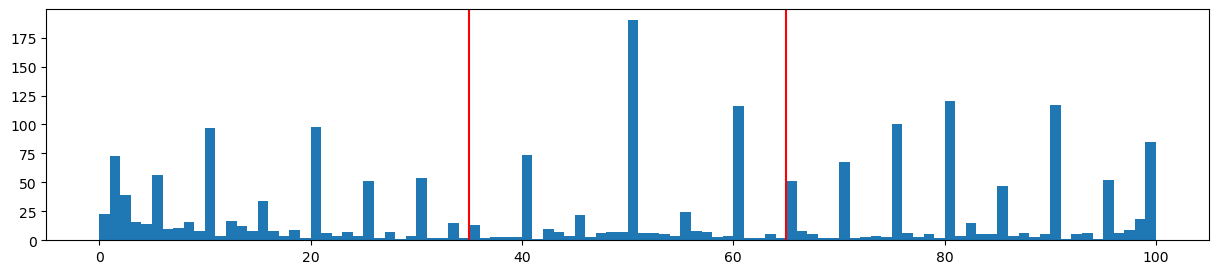

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
# plot a bar plot of female_perc
plt.hist(x=df_p9['female_perc'], bins=100)
# plot a verticle line at x = 35
plt.axvline(x=35, color='r')
plt.axvline(x=65, color='r')


<AxesSubplot: title={'center': 'Count of Organizations by Size'}>

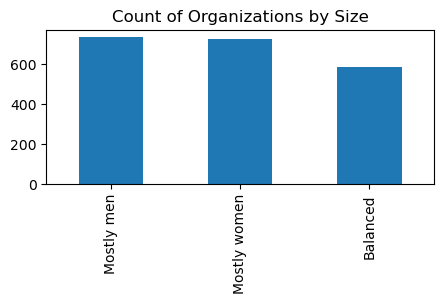

In [24]:
df_p10.gender_balance.value_counts().plot(kind='bar', title='Count of Organizations by Size', figsize=(5,2))

## Problem 11
Change the data type of all categorical features in the working data from "object" to "category". [1 point]

In [25]:
df_p11 = df_p10.copy()
print(df_p11.columns)
# first get all the columns that do not end with perc
categorical_cols = [col_name for col_name in df_p11.columns if not col_name.endswith("perc") ]
print(categorical_cols)

Index(['industry', 'org_size', 'org_type', 'premium_coverage',
       'premium_change', 'part_time_coverage', 'wellness_program',
       'work_from_home', 'under_30_perc', '60_older_perc', 'female_perc',
       'hourly_perc', 'off_shift_perc', 'remote_perc', 'union_perc',
       'turnover_perc', 'gender_balance'],
      dtype='object')
['industry', 'org_size', 'org_type', 'premium_coverage', 'premium_change', 'part_time_coverage', 'wellness_program', 'work_from_home', 'gender_balance']


In [26]:
# change the categorical_cols to categorical dtype
df_p11[categorical_cols] = df_p11[categorical_cols].astype('category')
df_p11.dtypes

industry              category
org_size              category
org_type              category
premium_coverage      category
premium_change        category
part_time_coverage    category
wellness_program      category
work_from_home        category
under_30_perc          float64
60_older_perc          float64
female_perc            float64
hourly_perc            float64
off_shift_perc         float64
remote_perc            float64
union_perc             float64
turnover_perc          float64
gender_balance        category
dtype: object

In [27]:
print(df_p11.shape)
df_p11.head()

(2842, 17)


,industry,org_size,org_type,premium_coverage,premium_change,part_time_coverage,wellness_program,work_from_home,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc,gender_balance
1732,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,same,no,yes,no,50.0,10.0,50.0,75.0,10.0,0.0,0.0,75.0,Balanced
1476,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,same,no,yes,no,40.0,10.0,30.0,60.0,30.0,5.0,0.0,10.0,Mostly men
1477,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,smaller,no,yes,yes,25.0,15.0,20.0,60.0,10.0,2.0,60.0,5.0,Mostly men
704,"Agriculture, Infrastructure, and Mining",Large,profit-private,full,same,no,yes,yes,20.0,15.0,17.0,62.0,10.0,5.0,0.0,11.0,Mostly men
1241,"Agriculture, Infrastructure, and Mining",Large,profit-private,full,same,no,yes,yes,20.0,25.0,50.0,70.0,20.0,5.0,0.0,3.0,Balanced


In [28]:
df_p11.describe()

,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc
count,1874.000000,1901.000000,2047.000000,1907.000000,1986.000000,2058.000000,2151.000000,1557.000000
mean,27.006403,12.237770,49.864680,62.243838,25.760826,13.651118,9.499303,16.398844
std,22.757196,13.900218,31.311489,32.979147,32.278475,26.838083,24.978649,20.895463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2.000000,20.000000,35.000000,0.000000,0.000000,0.000000,3.000000
50%,20.000000,10.000000,50.000000,75.000000,10.000000,0.000000,0.000000,10.000000
75%,40.000000,17.000000,80.000000,90.000000,50.000000,10.000000,0.000000,20.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Problem 12
Filter the data to only those rows that represent small workplaces that allow employees to work from home. Then report how many of these workplaces offer full insurance, partial insurance, and no insurance. Use a function that reports the percent, cumulative count, and cumulative percent in addition to the counts. [1 point]

I **could** just use the ``.query`` method, but I will use the .apply method that was described in this week's textbook reading. Here is the .query example I would have used:

``df_p12 = df_p11.query('org_size == "Small" & work_from_home == "yes"')``

In [29]:
# I want org_size == small, and work_from_home == yes
# COULD JUST DO THE QUERY
#df_p12 = df_p11.query('org_size == "Small" & work_from_home == "yes"')
# create a mapping of the conditions
# this is if I wanted to create a dataframe with ONLY the rows that meet the conditions, NOT if I want a True/False column
#df_p12_mapping = df_p11.apply(lambda x: x['org_size'] in ["Small"] and x['work_from_home'] in ["yes"], axis=1)
# print the count of true in df_p12_mapping
#print(df_p12_mapping.value_counts())
# use the mapping to only get the rows where the mapping is true
#df_p12 = df_p11[df_p12_mapping]

df_p12 = df_p11.copy()
df_p12['small_work_from_home'] = df_p12.apply(lambda x: x['org_size'] in ["Small"] and x['work_from_home'] in ["yes"], axis=1)
print(df_p12.shape)
df_p12.head()

(2842, 18)


,industry,org_size,org_type,premium_coverage,premium_change,part_time_coverage,wellness_program,work_from_home,under_30_perc,60_older_perc,female_perc,hourly_perc,off_shift_perc,remote_perc,union_perc,turnover_perc,gender_balance,small_work_from_home
1732,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,same,no,yes,no,50.0,10.0,50.0,75.0,10.0,0.0,0.0,75.0,Balanced,False
1476,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,same,no,yes,no,40.0,10.0,30.0,60.0,30.0,5.0,0.0,10.0,Mostly men,False
1477,"Agriculture, Infrastructure, and Mining",Large,profit-private,partial,smaller,no,yes,yes,25.0,15.0,20.0,60.0,10.0,2.0,60.0,5.0,Mostly men,False
704,"Agriculture, Infrastructure, and Mining",Large,profit-private,full,same,no,yes,yes,20.0,15.0,17.0,62.0,10.0,5.0,0.0,11.0,Mostly men,False
1241,"Agriculture, Infrastructure, and Mining",Large,profit-private,full,same,no,yes,yes,20.0,25.0,50.0,70.0,20.0,5.0,0.0,3.0,Balanced,False


In [40]:
# make df_p12['premium_coverage'] a category
df_p12['premium_coverage'] = df_p12['premium_coverage'].astype('category')
# make df_p12['premium_coverage'] ordered
df_p12['premium_coverage'].cat.reorder_categories(['none', 'partial', 'full'], inplace=True)

df_p12.stb.freq(['small_work_from_home','premium_coverage']).sort_values(by=['small_work_from_home','premium_coverage'], ascending = [True, True])

,small_work_from_home,premium_coverage,count,percent,cumulative_count,cumulative_percent
4,False,none,275,9.952950,2697,97.611292
0,False,partial,971,35.142961,971,35.142961
1,False,full,817,29.569309,1788,64.712269
5,True,none,66,2.388708,2763,100.000000
3,True,partial,310,11.219689,2422,87.658342
2,True,full,324,11.726384,2112,76.438654


##### Method 2 for completing problem 12

I **also** did this in a much more manual and complicated way my manually creating my own functions. I left the code here as a reference.

Now, for the "report how many of these workplaces offer full insurance, partial insurance, and no insurance. Use a function that reports the percent, cumulative count, and cumulative percent in addition to the counts."

In [29]:
df_12a = df_p12.groupby(['small_work_from_home','premium_coverage']).agg({'industry':['count']}).unstack()
df_12a.columns = df_12a.columns.droplevel(0)
df_12a.columns = ['count_full','count_none','count_partial']
df_12a

,count_full,count_none,count_partial
small_work_from_home,,,
False,817,275,971
True,324,66,310


Here i create a non-standard aggregation function for the percentage of the count

In [30]:
#df_p12.groupby(['small_work_from_home','premium_coverage']).agg({'industry':['count']}).unstack()
# create a non standard aggregation function for percentage of the count that is full coverage,
def perc_of_count(x):
    return (np.round(100 * x / float(x.sum()),2))
df_12b = df_p12.groupby(['small_work_from_home','premium_coverage']).agg({'industry':['count']}).unstack().apply(perc_of_count, axis=1)

df_12b.columns = df_12b.columns.droplevel(0)
df_12b.columns = ['percentage_full','percentage_none','percentage_partial']
df_12b

,percentage_full,percentage_none,percentage_partial
small_work_from_home,,,
False,39.60,13.33,47.07
True,46.29,9.43,44.29


Here is the cummulative sum

In [31]:
df_12c = df_p12.groupby(['small_work_from_home','premium_coverage']).agg({'industry':['count']}).cumsum().unstack()
df_12c.columns = df_12c.columns.droplevel(0)
df_12c.columns = ['cum_count_full','cum_count_none','cum_count_partial']
df_12c

,cum_count_full,cum_count_none,cum_count_partial
small_work_from_home,,,
False,817,1092,2063
True,2387,2453,2763


Now, I need the cummulative percent

In [32]:
def cum_perc_of_count(x):
    return (np.round(100 * x.cumsum()/ float(x.sum()),2))

In [33]:
# calculate the cummulative percentage
df_12d = df_p12.groupby(['small_work_from_home','premium_coverage']).agg({'industry':['count']}).unstack().apply(cum_perc_of_count, axis=1)

df_12d.columns = df_12d.columns.droplevel(0)
df_12d.columns = ['cum_percentage_full','cum_percentage_none','cum_percentage_partial']
df_12d

,cum_percentage_full,cum_percentage_none,cum_percentage_partial
small_work_from_home,,,
False,39.60,52.93,100.0
True,46.29,55.71,100.0


Merge all the columns together:

In [34]:
# join df_12a, df_12b, df_12c, df_12d on small_work_from_home
df_12e = df_12a.join(df_12b).join(df_12c).join(df_12d)
df_12e

,count_full,count_none,count_partial,percentage_full,percentage_none,percentage_partial,cum_count_full,cum_count_none,cum_count_partial,cum_percentage_full,cum_percentage_none,cum_percentage_partial
small_work_from_home,,,,,,,,,,,,
False,817,275,971,39.60,13.33,47.07,817,1092,2063,39.60,52.93,100.0
True,324,66,310,46.29,9.43,44.29,2387,2453,2763,46.29,55.71,100.0


## Problem 13
Anything that can be done in SQL can be done with `pandas`. The next several questions ask you to write `pandas` code to match a given SQL query. But to check that the SQL query and `pandas` code yield the same result, create a new database wsing the `sqlite3` package and input the cleaned WHA data as a table in this database. (See module 6 for a discussion of SQlite in Python.) [1 point]

In [35]:
# initialize a new database using Sqlite3
db_lab8 = sqlite3.connect('lab8.db')

# add clean df_p12 to the database
df_p12.to_sql('lab8', db_lab8, if_exists='replace', index=False)

2842

## Problem 14
Write `pandas` code that replicates the output of the following SQL code:
```
SELECT size, type, premiums AS insurance, percent_female FROM whpps
WHERE industry = 'Hospitals' AND premium_change='Smaller'
ORDER BY percent_female DESC;
```
For each of these queries, your feature names might be different from the ones listed in the query, depending on the names you chose in problem 3.
[2 points]

In [36]:
t_sql = """
SELECT org_size, org_type, premium_coverage AS insurance, female_perc FROM lab8
WHERE industry = 'Hospitals' AND premium_change='smaller'
ORDER BY female_perc DESC;
"""
cur = db_lab8.cursor()
cur.execute(t_sql)
rows = cur.fetchall()
#for row in rows:
#    print(row)

df_rows = pd.DataFrame(rows, columns=['org_size','org_type','insurance','female_perc'])
df_rows

,org_size,org_type,insurance,female_perc
0,Medium,non-profit,full,89.0
1,Large,non-profit,partial,80.0
2,Large,non-profit,partial,80.0
3,Small,non-profit,full,75.0
4,Medium,non-profit,partial,65.0
5,Medium,profit-private,full,50.0
6,Large,non-profit,partial,NaN
7,Medium,non-profit,full,NaN
8,Medium,None,partial,NaN
9,Medium,non-profit,partial,NaN


This is the **easy** way with the ```.query()``` syntax:

In [37]:
df_p12.query("industry == 'Hospitals' and premium_change == 'smaller'")[['org_size','org_type','premium_coverage','female_perc']].rename(columns = {'premium_coverage':'insurance'}).sort_values(by='female_perc', ascending=False)

,org_size,org_type,insurance,female_perc
320,Medium,non-profit,full,89.0
187,Large,non-profit,partial,80.0
214,Large,non-profit,partial,80.0
229,Small,non-profit,full,75.0
191,Medium,non-profit,partial,65.0
3,Medium,profit-private,full,50.0
97,Large,non-profit,partial,NaN
75,Medium,non-profit,full,NaN
11,Medium,NaN,partial,NaN
48,Medium,non-profit,partial,NaN


And here is with the ```.apply()``` syntax:

In [38]:
df_p12[df_p12.apply(lambda x: x['industry'] in ["Hospitals"] and x['premium_change'] in ["smaller"], axis=1)][['org_size','org_type','premium_coverage','female_perc']].rename(columns = {'premium_coverage':'insurance'}).sort_values(by='female_perc', ascending=False)

,org_size,org_type,insurance,female_perc
320,Medium,non-profit,full,89.0
187,Large,non-profit,partial,80.0
214,Large,non-profit,partial,80.0
229,Small,non-profit,full,75.0
191,Medium,non-profit,partial,65.0
3,Medium,profit-private,full,50.0
97,Large,non-profit,partial,NaN
75,Medium,non-profit,full,NaN
11,Medium,NaN,partial,NaN
48,Medium,non-profit,partial,NaN


## Problem 15
Write `pandas` code that replicates the output of the following SQL code:
```
SELECT industry, 
    AVG(percent_female) as percent_female, 
    AVG(percent_under30) as percent_under30,
    AVG(percent_over60) as percent_over60
FROM whpps
GROUP BY industry
ORDER BY percent_female DESC;
```
[2 points]

In [39]:
t_sql = """
SELECT industry, 
    AVG(female_perc) as percent_female, 
    AVG(under_30_perc) as percent_under30,
    AVG([60_older_perc]) as percent_over60
FROM lab8
GROUP BY industry
ORDER BY percent_female DESC;
"""
cur = db_lab8.cursor()
cur.execute(t_sql)
rows = cur.fetchall()
#for row in rows:
#    print(row)

df_rows = pd.DataFrame(rows, columns=['industry','percent_female','percent_under30','percent_over60'])
df_rows

,industry,percent_female,percent_under30,percent_over60
0,"Educational Services, Health Care, and Social ...",80.657143,25.745665,11.349570
1,Hospitals,76.427027,27.213793,16.489655
2,Entertainment and Recreation,53.804416,38.566343,11.544872
3,"Professional, Managementment, and Administrati...",50.632184,23.821752,12.465465
4,Public Administration,39.056738,21.015625,15.015385
5,"Trade, Transportation, and Warehousing",32.657258,29.108696,12.584034
6,"Agriculture, Infrastructure, and Mining",20.328605,22.257143,10.690355


In [40]:
df_ans = pd.DataFrame(df_p12.groupby(['industry']).agg({'female_perc':['mean'], 'under_30_perc':['mean'], '60_older_perc':['mean']}))
level_one = df_ans.columns.get_level_values(0).astype(str)
level_two = df_ans.columns.get_level_values(1).astype(str)
df_ans.columns = level_one + level_two
df_ans.sort_values('female_percmean', ascending=False)

,female_percmean,under_30_percmean,60_older_percmean
industry,,,
"Educational Services, Health Care, and Social Assistance",80.657143,25.745665,11.349570
Hospitals,76.427027,27.213793,16.489655
Entertainment and Recreation,53.804416,38.566343,11.544872
"Professional, Managementment, and Administrative Services",50.632184,23.821752,12.465465
Public Administration,39.056738,21.015625,15.015385
"Trade, Transportation, and Warehousing",32.657258,29.108696,12.584034
"Agriculture, Infrastructure, and Mining",20.328605,22.257143,10.690355


## Problem 16
Write `pandas` code that replicates the output of the following SQL code:
```
SELECT gender_balance, premiums, COUNT(*)
FROM whpps
GROUP BY gender_balance, premiums
HAVING gender_balance is NOT NULL and premiums is NOT NULL;
```
[2 points]

In [41]:
t_sql = """
SELECT gender_balance, premium_coverage, COUNT(*)
FROM lab8
GROUP BY gender_balance, premium_coverage
HAVING gender_balance is NOT NULL and premium_coverage is NOT NULL;
"""
cur = db_lab8.cursor()
cur.execute(t_sql)
rows = cur.fetchall()
#for row in rows:
#    print(row)

df_rows = pd.DataFrame(rows, columns=['gender_balance','premium_coverage','count'])
df_rows

,gender_balance,premium_coverage,count
0,Balanced,full,226
1,Balanced,none,77
2,Balanced,partial,271
3,Mostly men,full,301
4,Mostly men,none,91
5,Mostly men,partial,332
6,Mostly women,full,267
7,Mostly women,none,107
8,Mostly women,partial,333


In [78]:
df_ans_16 = pd.DataFrame(df_p12.groupby(['gender_balance','premium_coverage']).agg({'count'}))
level_one = df_ans.columns.get_level_values(0).astype(str)
# drop an index level
df_ans_16.columns = df_ans_16.columns.droplevel(0)
# drop all except the first column
df_ans_16 = df_ans_16.iloc[:,0:1]
df_ans_16.columns = ['count']
# repeat the index columns to make a dataframe
df_ans_16 = df_ans_16.reset_index()
df_ans_16

,gender_balance,premium_coverage,count
0,Mostly men,full,301
1,Mostly men,none,91
2,Mostly men,partial,332
3,Balanced,full,226
4,Balanced,none,77
5,Balanced,partial,271
6,Mostly women,full,267
7,Mostly women,none,107
8,Mostly women,partial,333


Finally, close the connection

In [ ]:
# close the connection to the sqlite database
db_lab8.close()